<a href="https://colab.research.google.com/github/KalyaniKudalkar/Data-Analytics-1_Exercises/blob/main/Exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise day 8 is followed by exercise day 7 since both are dependent on each other

**Exercises Day 7- Group Exercises: Advanced
Regression Analysis and Feature Selection**

Perform regression analysis on a dataset with over 1000 data points and at least 30 features. Apply preprocessing,
build models, evaluate performance, and enhance the model using feature selection methods. Demonstrate
creativity with additional techniques or insights.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Phone_Sales_2024.csv')

# Display the first few rows of the dataset
df.head()

,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,dimensions,weight,display_type,...,price_range,os_type,os_version,battery_size,colors_available,chip_company,cpu_core,gpu_company,fingerprint,video_resolution
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,medium price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512.0,8.0,9/20/2024,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),227.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Large,4,Apple,Hexa-core,Apple,Face,4K
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128.0,4.0,11/13/2020,131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in),135.0,"Super Retina XDR OLED, HDR10, Dolby Vision, 62...",...,medium price,iOS,14.1,Small,6,Apple,Hexa-core,Apple,Face,4K


1.Preprocessing

I.Handle missing values and outliers.




In [ ]:
# Checking for Missing Values
df.isnull().sum()

,0
phone_brand,0
phone_model,0
store,0
price_usd,0
storage,76
ram,72
launch_date,0
dimensions,0
weight,0
display_type,0


In [ ]:
df.dtypes

,0
phone_brand,object
phone_model,object
store,object
price_usd,float64
storage,float64
ram,float64
launch_date,object
dimensions,object
weight,float64
display_type,object


In [ ]:
# Handling Missing Values

# Mean
df['storage'] = df['storage'].fillna(df['storage'].mean())
df['ram'] = df['ram'].fillna(df['ram'].mean())
df['display_size'] = df['display_size'].fillna(df['display_size'].mean())

# Mode
df['display_resolution'] = df['display_resolution'].fillna(df['display_resolution'].mode()[0])
df['cpu_core'] = df['cpu_core'].fillna(df['cpu_core'].mode()[0])
df['gpu_company'] = df['gpu_company'].fillna(df['gpu_company'].mode()[0])


# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

phone_brand           0
phone_model           0
store                 0
price_usd             0
storage               0
ram                   0
launch_date           0
dimensions            0
weight                0
display_type          0
display_size          0
display_resolution    0
os                    0
nfc                   0
usb                   0
battery               0
features_sensors      0
colors                0
video                 0
chipset               0
cpu                   0
gpu                   0
year                  0
foldable              0
ppi_density           0
quantile_10           0
quantile_50           0
quantile_90           0
price_range           0
os_type               0
os_version            0
battery_size          0
colors_available      0
chip_company          0
cpu_core              0
gpu_company           0
fingerprint           0
video_resolution      0
dtype: int64


After identifying missing values, we performed mean for numerical data and mode for categorical data for handling them and again checked for missing values.

In [ ]:
# Checking for Outliers and removing them if there are any

def cap_outliers(df):
      for column in df.select_dtypes(include=['number']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

      print(f"Number of outliers: {len(column_outliers)}")
      return df

df_new = cap_outliers(df)

print("Cleaned Data:")
print(df_new.describe())

Number of outliers: 227
Cleaned Data:
         price_usd      storage          ram       weight  display_size  \
count  1708.000000  1708.000000  1708.000000  1708.000000   1708.000000   
mean    419.983156   272.696078     7.986553   195.203769      6.562739   
std     361.680703   203.494039     3.336937    24.738661      0.346170   
min      52.630000    32.000000     2.000000   135.000000      4.700000   
25%     167.562500   128.000000     6.000000   183.500000      6.500000   
50%     278.835000   256.000000     8.000000   193.500000      6.585000   
75%     550.327500   272.696078    12.000000   204.000000      6.700000   
max    2353.820000  1000.000000    24.000000   627.000000     10.900000   

               nfc       battery     foldable  ppi_density  quantile_10  \
count  1708.000000   1708.000000  1708.000000  1708.000000  1708.000000   
mean      0.917447   4657.326698     0.048595   403.826112   125.729804   
std       0.275286    694.689807     0.215082    71.794438   

In [ ]:
df_new.head()

,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,dimensions,weight,display_type,...,price_range,os_type,os_version,battery_size,colors_available,chip_company,cpu_core,gpu_company,fingerprint,video_resolution
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,medium price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512.0,8.0,9/20/2024,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),227.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Large,4,Apple,Hexa-core,Apple,Face,4K
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128.0,4.0,11/13/2020,131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in),135.0,"Super Retina XDR OLED, HDR10, Dolby Vision, 62...",...,medium price,iOS,14.1,Small,6,Apple,Hexa-core,Apple,Face,4K


II.Scale features using standardization or normalization.

In [ ]:
# Select only numerical features for scaling
numerical_features = df_new.select_dtypes(include=['number']).columns
numerical_df = df_new[numerical_features]

#Standardization (Z-Score Scaling)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(numerical_df)
print("Standardized Data:\n", data_standardized)



Standardized Data:
 [[ 2.59300931 -0.08207104  0.00403105 ...  2.07583209  1.74230508
   0.1498261 ]
 [ 2.96637603  1.1763195   0.00403105 ...  2.07583209  1.74230508
   0.1498261 ]
 [ 3.55482963  3.57512648  0.00403105 ...  2.07583209  1.74230508
   0.1498261 ]
 ...
 [-0.71626438 -0.71126632 -0.59549643 ... -0.59459226 -0.21515863
  -0.49476577]
 [-0.42404269 -0.71126632  0.00403105 ... -0.56193403 -0.91330361
   0.1498261 ]
 [ 0.26278613  0.          1.20308602 ... -0.56193403 -0.91330361
  -1.13935764]]


III.Perform feature selection.

In [ ]:
# Wrapper Methods (Recursive Feature Elimination)
X = df_new.select_dtypes(include=['number']).drop("price_usd", axis=1)  # Drop target variable
y = df_new["price_usd"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LinearRegression()


rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)



model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"Model R^2 Score with Selected Features: {score:.4f}")

Selected Features: Index(['ram', 'weight', 'display_size', 'nfc', 'foldable', 'colors_available'], dtype='object')
Model R^2 Score with Selected Features: 0.5697


Performed Recursive Feature Elimination method for feature selection.
After performing the method, the most important features for a regression model are 'ram', 'weight', 'display_size', 'nfc', 'foldable', 'colors_available'.

The R² score of the linear regression model is 0.5697 which means there is approximately 56.97% of the variance in the target variable 'price_usd'

**2.Build and Evaluate Models**

I.Train a Linear Regression model.

II.Evaluate using R² Score and RMSE.

III.Perform K-Fold Cross-Validation (e.g., 5-fold).

Even if the most important features for a regression model are 'ram', 'weight', 'display_size', 'nfc', 'foldable', and 'colors_available', we decided to train a Linear Regression model with the features 'phone_brand','phone_model','store',and 'features_sensors' since we think these are the features which contributes more towards the target which is 'price_usd'

In [ ]:
'''
Performed frequency encoding to convert the categorical data into numerical form
so as to use it in the linear regression model.
'''

def frequency_encoding(df_new, columns):
    for col in columns:
        # Calculate frequency of each category
        frequency_map = df_new[col].value_counts(normalize=True).to_dict()

        # Map frequencies to the original column
        df_new[col + '_freq_encoded'] = df_new[col].map(frequency_map)

    # Drop the original categorical columns
    df_new = df_new.drop(columns=columns, axis=1)

    return df_new

# Example usage:
categorical_cols = ['phone_brand','phone_model','store','features_sensors']
df_encoded = frequency_encoding(df_new, categorical_cols)

print(df_encoded.head())

   price_usd  storage  ram launch_date  \
0    1357.55    256.0  8.0   9/20/2024   
1    1492.55    512.0  8.0   9/20/2024   
2    1705.32   1000.0  8.0   9/20/2024   
3    1564.92    512.0  8.0   9/20/2024   
4     247.32    128.0  4.0  11/13/2020   

                                      dimensions  weight  \
0  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
1  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
2  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
3    163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in)   227.0   
4  131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in)   135.0   

                                        display_type  display_size  \
0  LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...           6.3   
1  LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...           6.3   
2  LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...           6.3   
3  LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...           6.9   
4  Super Retina XDR OLED, HDR10, Dol

In [ ]:
# Select relevant numerical features and target
features = ['phone_brand_freq_encoded','phone_model_freq_encoded','store_freq_encoded','features_sensors_freq_encoded']
target = 'price_usd'

# 1. Train a Linear Regression model.

# Split data into training and testing sets
X = df_new[features]
y = df_new[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coefficients)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define custom scoring metrics
rmse_scorer = make_scorer(mean_squared_error)  # RMSE
r2_scorer = make_scorer(r2_score)  # R² Score

# Perform cross-validation
rmse_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

# Print the results
print(f"Average RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Average R² Score: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Mean Squared Error: 126495.40712583816
R-squared Score: 0.12150477739771504
R² Score: 0.1215
Root Mean Squared Error (RMSE): 355.66
                         Feature   Coefficient
0       phone_brand_freq_encoded   -946.883042
1       phone_model_freq_encoded  62326.692227
2             store_freq_encoded   -779.948613
3  features_sensors_freq_encoded    590.304553
Average RMSE: 113780.56 ± 11847.98
Average R² Score: 0.1260 ± 0.0315


RMSE indicates that the average prediction error is approximately $355.66.

The R² score of 0.1215 suggests that the model explains only 12.15% of the variance in the target variable, indicating a poor fit.

RMSE from cross-validation suggests high prediction error across folds, further confirming the model's limited effectiveness.

The model consistently explains around 12.6% of the variance during cross-validation, with minor variation.

**3.Enhance the Model**

I.Experiment with feature selection techniques and analyze their impact.

II.Visualize results (e.g., feature importance, residual plots).

Univariate Feature Selection
Selected Features: ['phone_brand_freq_encoded' 'phone_model_freq_encoded'
 'store_freq_encoded']
R² Score: 0.1301, RMSE: 353.92

Recursive Feature Elimination (RFE)
Selected Features: ['phone_brand_freq_encoded' 'phone_model_freq_encoded'
 'store_freq_encoded']
R² Score: 0.1301, RMSE: 353.92

Feature Importance with Random Forest
Feature Importances:
 phone_brand_freq_encoded         0.238009
phone_model_freq_encoded         0.245746
store_freq_encoded               0.215329
features_sensors_freq_encoded    0.300916
dtype: float64
R² Score: 0.1215, RMSE: 355.66



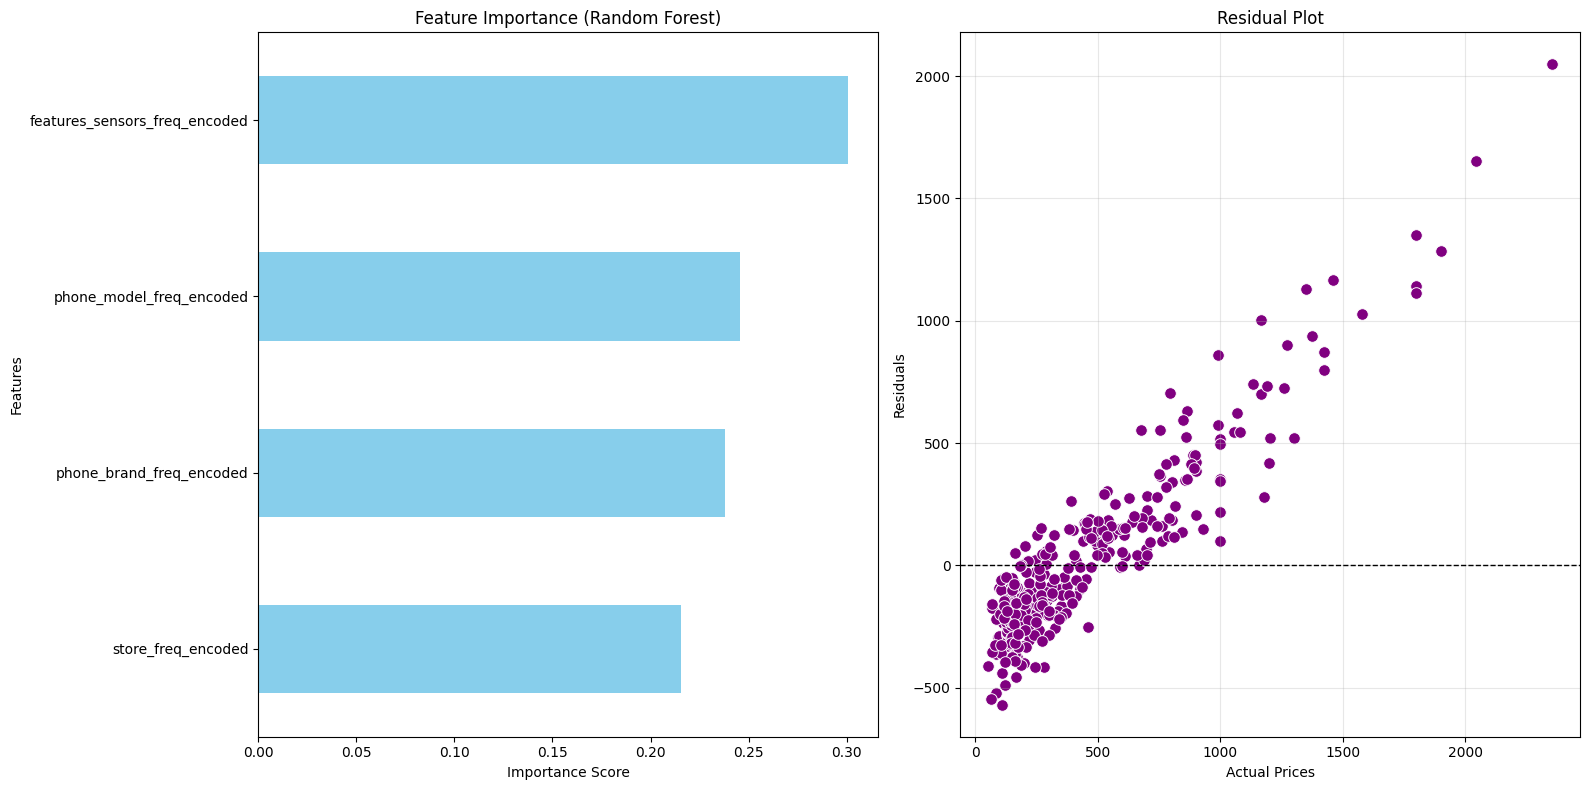

In [ ]:
# 1. Univariate Feature Selection
print("Univariate Feature Selection")
selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X_train, y_train)
selected_features_univariate = np.array(features)[selector.get_support()]
print("Selected Features:", selected_features_univariate)

model.fit(X_new, y_train)
y_pred_univariate = model.predict(selector.transform(X_test))
r2_uni = r2_score(y_test, y_pred_univariate)
rmse_uni = np.sqrt(mean_squared_error(y_test, y_pred_univariate))
print(f"R² Score: {r2_uni:.4f}, RMSE: {rmse_uni:.2f}\n")

# 2. Recursive Feature Elimination (RFE)
print("Recursive Feature Elimination (RFE)")
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_train, y_train)
selected_features_rfe = np.array(features)[rfe.support_]
print("Selected Features:", selected_features_rfe)

y_pred_rfe = rfe.predict(X_test)
r2_rfe = r2_score(y_test, y_pred_rfe)
rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
print(f"R² Score: {r2_rfe:.4f}, RMSE: {rmse_rfe:.2f}\n")

# 3. Feature Importance with Random Forest
print("Feature Importance with Random Forest")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=features)
print("Feature Importances:\n", feature_importances)

# Use top 3 features based on importance
top_features = feature_importances.index
X_train_rf = X_train[top_features]
X_test_rf = X_test[top_features]

model.fit(X_train_rf, y_train)
y_pred_rf = model.predict(X_test_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"R² Score: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}\n")

# Feature Importance (Random Forest)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=features)

# Residual Plot
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Visualization
plt.figure(figsize=(16, 8))

# 1. Feature Importance
plt.subplot(1, 2, 1)
feature_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")

# 2. Residual Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=residuals, color='purple', edgecolor='w', s=70)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Plot")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Univariate Feature Selection**  and  **Recursive Feature Elimination (RFE)**   
For both the methods, the R² Score suggests that there are 13.01% of the variance in the target variable (price_usd) where as the average prediction error (RMSE) is $353.92.

This means the selected features dominate regardless of the method.   

**Feature Importance with Random Forest**         
Feature Importances:

features_sensors_freq_encoded (30.09%) is the most important feature.
phone_model_freq_encoded (24.57%) and phone_brand_freq_encoded (23.80%) are moderately important.
store_freq_encoded (21.53%) contributes the least.


The R² Score of 12.15% explains that there is variance in the target variable which is slightly worse where as the prediction error is $355.66, slightly higher than in the previous methods.

**Feature Importance**  
The most important feature is features_sensors_freq_encoded, followed by phone_model_freq_encoded and phone_brand_freq_encoded, with store_freq_encoded being the least important among the four.

**Residual Plot**   
The plot shows that as actual prices increase, the residuals also increase, which might indicate a non-linear relationship. The presence of large residuals for higher actual prices suggests that the model is underperforming for higher-priced phones.


**4.Creativity**

I.Try advanced models (e.g., Ridge, Lasso, Polynomial).

II.Create insightful visualizations or optimize hyperparameters.


**Ridge Regression**      
R² Score is only 6.77% of the variance in the target variable (price_usd) which means there is limited predictive power where as the average prediction error (RMSE) is $366.40, the highest among the three models.


**Lasso Regression**
R² Score is 8.49% of the variance which is slightly better than Ridge but still relatively low and Error (RMSE: 362.99) is smaller than Ridge but still high.

**Polynomial Regression (Degree 2)**
R² Score is 17.24% of the variance, a significant improvement over Ridge and Lasso and RMSE is 345.21 which means Lowest error among the models, indicating better predictions.

**Residual Plot**   
This suggests that the Polynomial Regression model has difficulty predicting higher-priced items accurately, similar to the previous linear models.

**Feature Coefficients**  
Phone model frequency (phone_model_freq_encoded) has the largest positive coefficient, followed by other features such as features_sensors_freq_encoded, phone_brand_freq_encoded, and store_freq_encoded.


Model Performance Comparison:

Ridge: R² = 0.0677, RMSE = 366.40
Lasso: R² = 0.0849, RMSE = 362.99
Polynomial (degree=2): R² = 0.1724, RMSE = 345.21


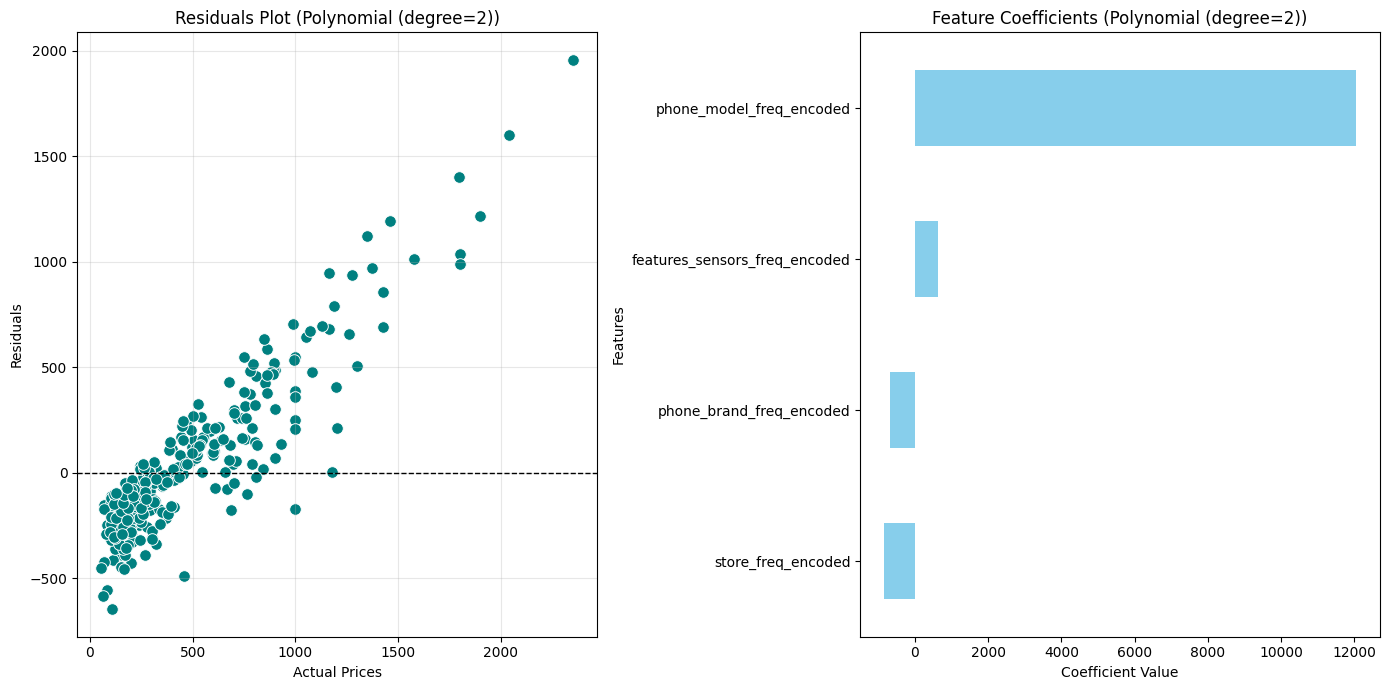


Best Hyperparameters:
Ridge Best Alpha: 0.1
Lasso Best Alpha: 0.1


In [ ]:
# Initialize a results dictionary for comparisons
results = {}

# 1. Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_

y_pred_ridge = ridge_best.predict(X_test)
results['Ridge'] = {
    'R²': r2_score(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge))
}

# 2. Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_

y_pred_lasso = lasso_best.predict(X_test)
results['Lasso'] = {
    'R²': r2_score(y_test, y_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
}

# 3. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

results['Polynomial (degree=2)'] = {
    'R²': r2_score(y_test, y_pred_poly),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly))
}

# Display results
print("\nModel Performance Comparison:\n")
for model, metrics in results.items():
    print(f"{model}: R² = {metrics['R²']:.4f}, RMSE = {metrics['RMSE']:.2f}")

# Visualize Results
plt.figure(figsize=(14, 7))

# Residuals Plot for the Best Model
best_model = max(results, key=lambda x: results[x]['R²'])
if best_model == 'Polynomial (degree=2)':
    residuals = y_test - y_pred_poly
elif best_model == 'Ridge':
    residuals = y_test - y_pred_ridge
else:
    residuals = y_test - y_pred_lasso

# 1. Residuals Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=residuals, color='teal', edgecolor='w', s=70)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title(f"Residuals Plot ({best_model})")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)

# 2. Coefficients Visualization (for Ridge or Lasso)
#if best_model in ['Ridge', 'Lasso']:
coef = pd.Series(ridge_best.coef_ if best_model == 'Ridge' else lasso_best.coef_, index=features)
plt.subplot(1, 2, 2)
coef.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title(f"Feature Coefficients ({best_model})")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

# Hyperparameter Summary
print("\nBest Hyperparameters:")
print(f"Ridge Best Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Lasso Best Alpha: {lasso_cv.best_params_['alpha']}")

# **EXERCISE DAY 8**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 1.Tree Models:

1.Implement three different decision tree models (e.g., Decision Tree Classifier, Random Forest, Gradient Boosted Trees).

In [ ]:
features = ['phone_brand_freq_encoded','phone_model_freq_encoded','store_freq_encoded','features_sensors_freq_encoded']
target = 'price_range'

# Split data into training and testing sets
X = df_new[features]
y = df_new[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Decision Tree Classifier

# Initialize and train the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_tree = tree_clf.predict(X_test)

# Evaluation Metrics
print("Decision Tree Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tree, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_tree, average='weighted'))

Decision Tree Classifier Results
Accuracy: 0.7953216374269005
Precision: 0.8142291022501912
Recall: 0.7953216374269005
F1 Score: 0.8029407423647741


In [ ]:
# 2. Random Forest Classifier

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics
print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest Classifier Results
Accuracy: 0.827485380116959
Precision: 0.8108852377858224
Recall: 0.827485380116959
F1 Score: 0.8146856860118509


In [ ]:
# 3. Gradient Boosted Trees

# Initialize and train the Random Forest Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_gb = gb_clf.predict(X_test)

# Evaluation Metrics
print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_gb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_gb, average='weighted'))

Random Forest Classifier Results
Accuracy: 0.8450292397660819
Precision: 0.8392738174550299
Recall: 0.8450292397660819
F1 Score: 0.8154439764429158


# 2.KNN Model:

1.Use the K-Nearest Neighbors algorithm and identify the optimal value of kk by plotting its performance against different kk-values.

In [ ]:
features = ['phone_brand_freq_encoded','phone_model_freq_encoded','store_freq_encoded','features_sensors_freq_encoded']
target = 'price_range'

# Split data into training and testing sets
X = df_new[features]
y = df_new[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. K-Nearest Neighbors Classifier

# Initialize and train the K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_knn = knn_clf.predict(X_test)

# Evaluation Metrics
print("K-Nearest Neighbors Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

K-Nearest Neighbors Classifier Results
Accuracy: 0.8070175438596491
Precision: 0.7881750216627327
Recall: 0.8070175438596491
F1 Score: 0.7938419895914459


In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models = {"Decision Tree": tree_clf, "Random Forest": rf_clf, "Gradient Boosted": gb_clf, "KNN": knn_clf}

for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} - Average Accuracy: {np.mean(accuracy_scores):.2f}")

Decision Tree - Average Accuracy: 0.78
Random Forest - Average Accuracy: 0.81
Gradient Boosted - Average Accuracy: 0.84
KNN - Average Accuracy: 0.80


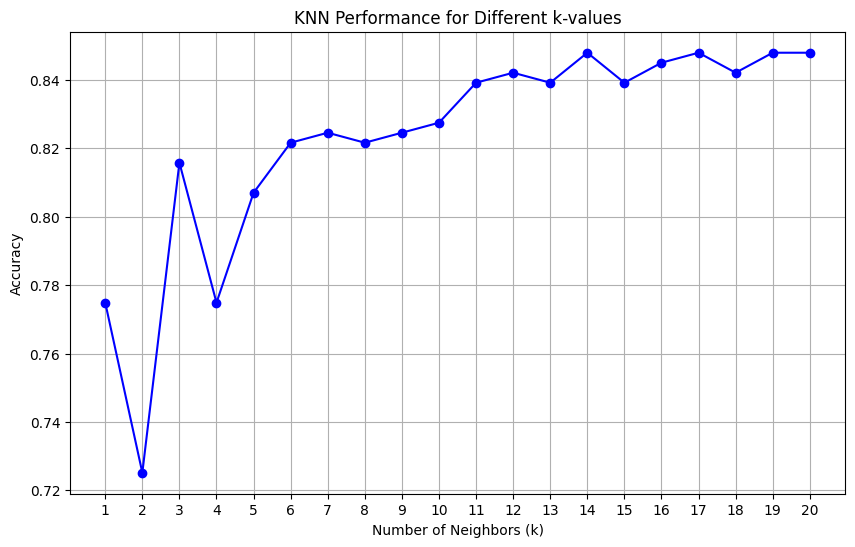

Optimal k: 14, with Accuracy: 0.85


In [ ]:
# Identifying the optimal value of kk by plotting its performance against different kk-values

#Initialize a list to store accuracies for different k-values
k_values = range(1, 21)  # Test k from 1 to 20
accuracies = []

# Train and evaluate KNN for each k-value
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    acc = accuracy_score(y_test, knn_predictions)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Performance for Different k-values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k-value
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"Optimal k: {optimal_k}, with Accuracy: {max(accuracies):.2f}")


# 3. Evaluation Metrics:

1.Evaluate all models using metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# Dictionary to store metrics for each model
evaluation_results = {}

# Evaluate each model
for model_name, model in models.items():
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    evaluation_results[model_name] = report

# Display evaluation metrics
for model_name, metrics in evaluation_results.items():
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precision (Macro Avg): {metrics['macro avg']['precision']:.2f}")
    print(f"Recall (Macro Avg): {metrics['macro avg']['recall']:.2f}")
    print(f"F1-Score (Macro Avg): {metrics['macro avg']['f1-score']:.2f}")
    print('-' * 50)


Evaluation Metrics for Decision Tree:
Accuracy: 0.80
Precision (Macro Avg): 0.63
Recall (Macro Avg): 0.69
F1-Score (Macro Avg): 0.65
--------------------------------------------------
Evaluation Metrics for Random Forest:
Accuracy: 0.83
Precision (Macro Avg): 0.69
Recall (Macro Avg): 0.59
F1-Score (Macro Avg): 0.63
--------------------------------------------------
Evaluation Metrics for Gradient Boosted:
Accuracy: 0.85
Precision (Macro Avg): 0.82
Recall (Macro Avg): 0.53
F1-Score (Macro Avg): 0.60
--------------------------------------------------
Evaluation Metrics for KNN:
Accuracy: 0.81
Precision (Macro Avg): 0.63
Recall (Macro Avg): 0.55
F1-Score (Macro Avg): 0.58
--------------------------------------------------


# 4. Optimal kk for KNN:


1.Determine the best-fit kk for KNN by visualizing performance metrics across varying kk-values.

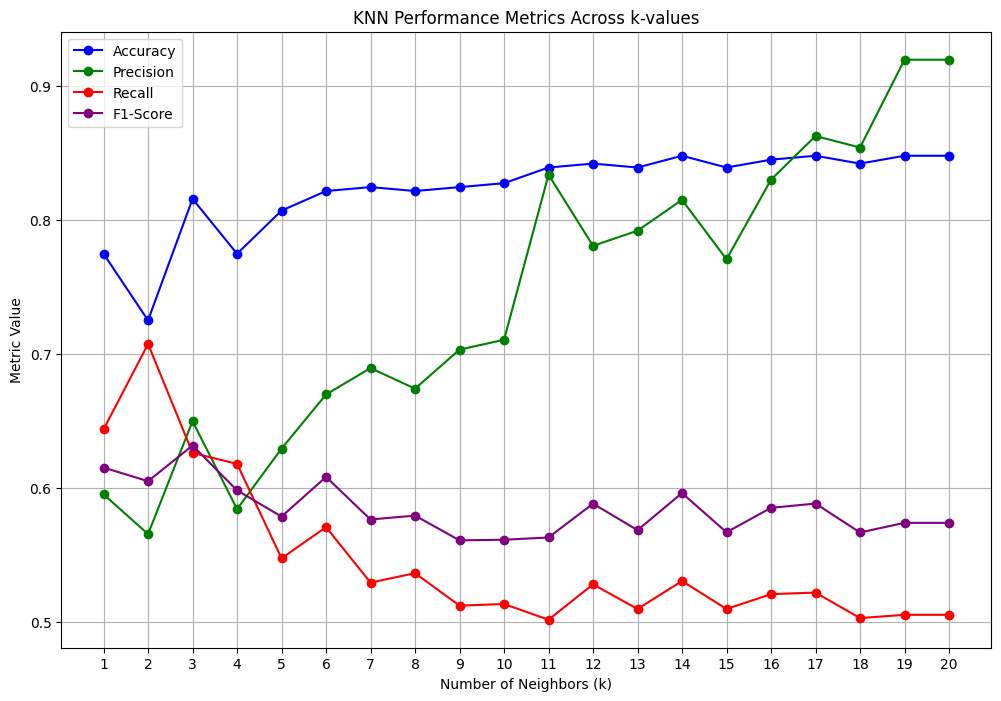

Optimal k: 3 with F1-Score: 0.63


In [ ]:
# Range of k-values to evaluate
k_values = range(1, 21)

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each k value
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)

    # Get metrics
    report = classification_report(y_test, predictions, output_dict=True)
    accuracies.append(report['accuracy'])
    precisions.append(report['macro avg']['precision'])
    recalls.append(report['macro avg']['recall'])
    f1_scores.append(report['macro avg']['f1-score'])

# Plot performance metrics
plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracies, marker='o', label='Accuracy', color='b')
plt.plot(k_values, precisions, marker='o', label='Precision', color='g')
plt.plot(k_values, recalls, marker='o', label='Recall', color='r')
plt.plot(k_values, f1_scores, marker='o', label='F1-Score', color='purple')

plt.title('KNN Performance Metrics Across k-values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metric Value')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Optimal k based on F1-score
optimal_k = k_values[f1_scores.index(max(f1_scores))]
print(f"Optimal k: {optimal_k} with F1-Score: {max(f1_scores):.2f}")
